In [52]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import IPython
import sklearn
import mglearn
import seaborn as sn

In [53]:
from pandas import read_csv

traindata = read_csv("train.csv")
testdata = read_csv("test.csv")

traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
# Prepare sets
dropped = ["PassengerId", "Name", "Ticket", "Cabin", "Age"]

x_train = traindata.drop(columns=dropped + ["Survived"])
y_train = traindata["Survived"]
x_test = testdata.drop(columns=dropped)
#y_test = testdata["Survived"]

x_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,1,0,7.2500,S
1,1,female,1,0,71.2833,C
2,3,female,0,0,7.9250,S
3,1,female,1,0,53.1000,S
4,3,male,0,0,8.0500,S


In [55]:
# Convert sex and embarked
x_train['Sex']=pd.factorize(x_train['Sex'])[0] # F=0 M=1
x_train['Embarked']=pd.factorize(x_train['Embarked'])[0] # C=0 Q=1 S=2
x_test['Sex']=pd.factorize(x_test['Sex'])[0] # F=0 M=1
x_test['Embarked']=pd.factorize(x_test['Embarked'])[0] # C=0 Q=1 S=2

#x_train.head()

In [56]:
x_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,0,0,7.8292,0
1,3,1,1,0,7.0000,1
2,2,0,0,0,9.6875,0
3,3,0,0,0,8.6625,1
4,3,1,1,1,12.2875,1


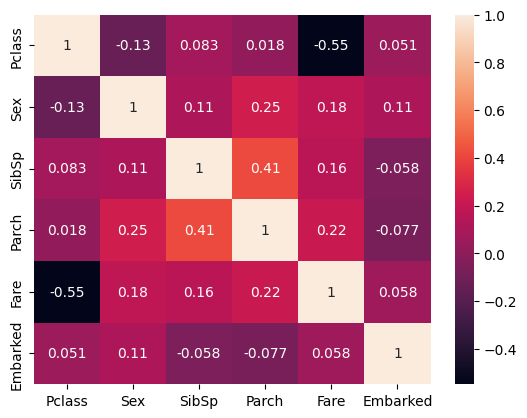

In [57]:
# Correlation table
sn.heatmap(x_train.corr(),
           annot=True)
plt.show()

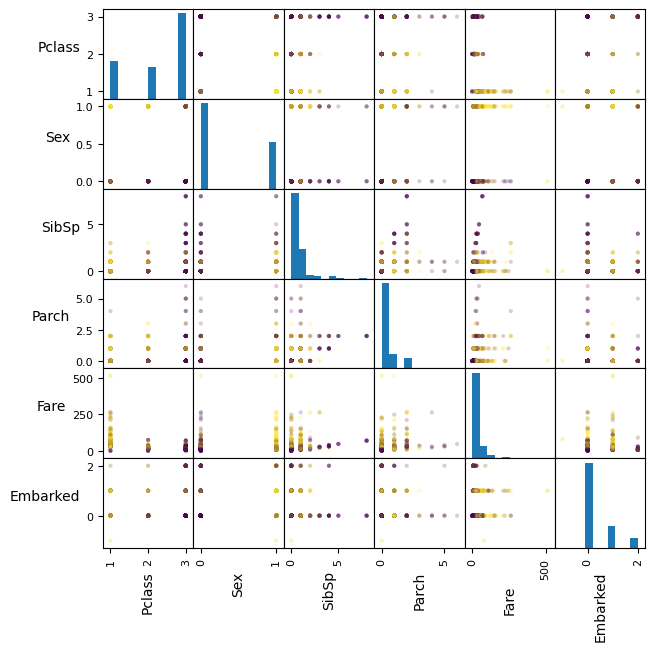

In [58]:
# Pair plotting using 'Survived' to color
tsm = pd.plotting.scatter_matrix(x_train,
                                c=y_train,
                                figsize=(7,7),
                                alpha=0.2,
                                range_padding=0.2) # transparency
for ax in tsm.flatten(): #rotate the labels so they don't overlap
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# For some reason, does not work with the 'Age' paramether

In [59]:
# test with kneighbors (probably worst algorithm existent for this)
from sklearn.neighbors import KNeighborsClassifier

print(x_train.shape, y_train.shape)
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train, y_train)

(891, 6) (891,)


KNeighborsClassifier(n_neighbors=1)

In [60]:
x_test.head()

predictions = knn.predict(x_test)
print(predictions)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values